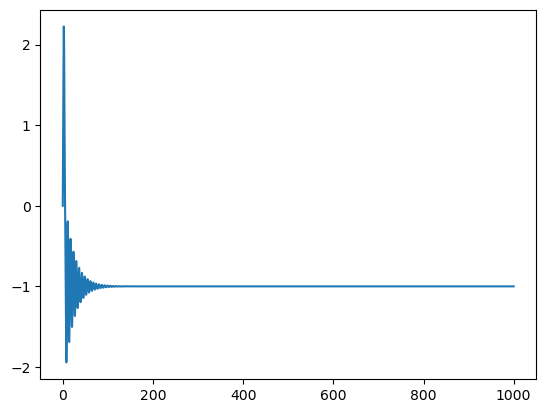

In [32]:
import numpy as np
import matplotlib.pyplot as plt


#tau*gam=2<<분기
tau=220.
gam=0.1
tmax=1000.
dt=1.e-2


t=0.
x=0.
xs=0.
v=1.

xx=np.zeros(imax)
xsxs=np.zeros(imax)
vv=np.zeros(imax)
tt=np.zeros(imax)


imax=int(tmax/dt)


#make noise
noise=np.zeros(imax)

for i in range(imax):

    u1=np.random.rand(1)
    u2=np.random.rand(1)


    z1 = np.sqrt(-2. * np.log(u1)) * np.cos(2.*np.pi* u2)
    z2 = np.sqrt(-2. * np.log(u1)) * np.sin(2.*np.pi* u2)

    noise=np.append(noise,z1)
    


def fx(t,x,v):
    velocity=v
    return velocity


def fxs(t,x,xs):
    velocity=(x-xs)/tau
    return velocity


def fv(i,t,x,xs,v):
    #eq. of motion
    accelaration=-gam*v-x+np.sign(x-xs)+noise[i]
    return accelaration



for i in range(imax):

    #record
    xx=np.append(xx,x)
    xsxs=np.append(xsxs,x)
    vv=np.append(vv,v)
    tt=np.append(tt,t)
    
    t=i*dt
    
    k1x=fx(t,x,v)
    k1xs=fxs(t,x,xs)
    
    k1v=fv(i,t,x,xs,v)

    
    k2x=fx(t+dt/2.,x+dt*k1x/2.,v+dt*k1v/2.)
    
    k2xs=fxs(t+dt/2.,x+dt*k1x/2.,xs+dt*k1xs/2.)
    
    k2v=fv(i,t+dt/2.,x+dt*k1x/2.,xs+dt*k1xs/2.,v+dt*k1v/2.)

    
    k3x=fx(t+dt/2.,x+dt*k2x/2.,v+dt*k2v/2.)
    
    k3xs=fxs(t+dt/2.,x+dt*k2x/2.,xs+dt*k2xs/2.)
    
    k3v=fv(i,t+dt/2.,x+dt*k2x/2.,xs+dt*k2xs/2.,v+dt*k2v/2.)

    
    k4x=fx(t+dt,x+dt*k3x,v+dt*k3v)
    
    k4xs=fxs(t+dt,x+dt*k3x,xs+dt*k3xs)
    
    k4v=fv(i,t+dt,x+dt*k3x,xs+dt*k3xs,v+dt*k3v)

    
    #update
    x=x+dt*(k1x+2.*k2x+2.*k3x+k4x)/6.

    xs=xs+dt*(k1xs+2.*k2xs+2.*k3xs+k4xs)/6.
    
    v=v+dt*(k1v+2.*k2v+2.*k3v+k4v)/6.
    

plt.plot(tt,xx)

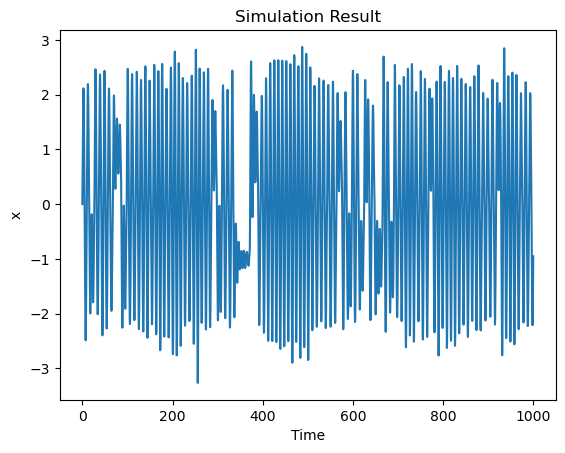

Execution time: 20.102989673614502 seconds


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numba import jit
import time

# Parameters
tau = 15.
gam = 0.1
tmax = 1000.
dt = 1.e-3
imax = int(tmax / dt)

# Generate noise (not JIT compiled)
def generate_noise(imax):
    noise = np.zeros(imax)
    for i in range(imax):
        u1 = np.random.rand(1)
        u2 = np.random.rand(1)
        z1 = np.sqrt(-2. * np.log(u1)) * np.cos(2.*np.pi* u2)
        noise[i] = z1[0]
    return noise

# Define functions for ODE (JIT compiled)
@jit(nopython=True)
def fx(t, x, v):
    return v

@jit(nopython=True)
def fxs(t, x, xs):
    return (x - xs) / tau

@jit(nopython=True)
def fv(t, x, xs, v, noise):
    return -gam * v - x + np.sign(x - xs) + noise

# Integrate ODE using solve_ivp
def integrate_ode():
    noise = generate_noise(imax)
    t_span = (0, tmax)
    y0 = [0, 0, 1]  # Initial conditions: x, xs, v
    t_eval = np.linspace(0, tmax, imax)
    sol = solve_ivp(lambda t, y: [fx(t, y[0], y[2]),
                                   fxs(t, y[0], y[1]),
                                   fv(t, y[0], y[1], y[2], noise[int(t / dt) - 1])],
                    t_span, y0, t_eval=t_eval)
    return sol.t, sol.y[0]

# Plotting
start_time = time.time()
t, x = integrate_ode()
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulation Result')
plt.show()
print("Execution time: %s seconds" % (time.time() - start_time))


In [10]:
import numpy as np  # 수치 연산을 위한 NumPy 라이브러리를 불러옵니다
import matplotlib.pyplot as plt  # 그래픽 출력을 위한 Matplotlib 라이브러리를 불러옵니다
from scipy.integrate import solve_ivp  # ODE(Ordinary Differential Equations)를 풀기 위한 solve_ivp 함수를 불러옵니다
from numba import jit  # JIT(Just-In-Time) 컴파일을 위한 Numba 라이브러리의 jit 데코레이터를 불러옵니다
import time  # 실행 시간을 측정하기 위한 time 모듈을 불러옵니다

# Parameters
tau = 19.  # 시간 상수
gam = 0.1  # 감쇠 계수
tmax = 1000.  # 최대 시간
dt = 1.e-3  # 시간 간격
imax = int(tmax / dt)  # 최대 시간 스텝 인덱스

# Generate noise (not JIT compiled)
def generate_noise(imax):
    noise = np.zeros(imax)  # 노이즈 값을 저장할 배열을 초기화합니다
    for i in range(imax):  # 시간 스텝을 반복합니다
        u1 = np.random.rand(1)  # 0과 1 사이의 난수를 생성합니다
        u2 = np.random.rand(1)  # 0과 1 사이의 난수를 생성합니다
        z1 = np.sqrt(-2. * np.log(u1)) * np.cos(2.*np.pi* u2)  # Box-Muller 변환을 사용하여 노이즈를 생성합니다
        noise[i] = z1[0]  # 노이즈 값을 배열에 저장합니다
    return noise  # 생성된 노이즈 배열을 반환합니다

# Define functions for ODE (JIT compiled)
@jit(nopython=True)  # JIT 컴파일을 위한 데코레이터
def fx(t, x, v):
    return v  # x에 대한 미분값을 반환합니다

@jit(nopython=True)  # JIT 컴파일을 위한 데코레이터
def fxs(t, x, xs):
    return (x - xs) / tau  # xs에 대한 미분값을 반환합니다

@jit(nopython=True)  # JIT 컴파일을 위한 데코레이터
def fv(t, x, xs, v, noise):
    return -gam * v - x + np.sign(x - xs) + noise  # v에 대한 미분값을 반환합니다


# Integrate ODE using solve_ivp
def integrate_ode():
    noise = generate_noise(imax)  # 노이즈를 생성합니다
    t_span = (0, tmax)  # 적분 시간 구간
    y0 = [0, 0, 1]  # 초기 조건: x, xs, v
    t_eval = np.linspace(0, tmax, imax)  # 해를 저장할 시간 포인트
    sol = solve_ivp(lambda t, y: [fx(t, y[0], y[2]),  # 미분방정식을 람다 함수로 정의합니다
                                   fxs(t, y[0], y[1]),
                                   fv(t, y[0], y[1], y[2], noise[int(t / dt)])],  # 해당 시간의 노이즈를 전달합니다
                    t_span, y0, t_eval=t_eval, method='RK45')  # solve_ivp를 사용하여 미분방정식을 푼다
    return sol.t, sol.y[0]  # 시간 배열과 x의 해를 반환합니다


# Plotting
start_time = time.time()  # 시작 시간 기록
t, x, xs = integrate_ode()  # 미분방정식을 적분하고 시간 배열과 x의 해를 얻습니다
#plt.plot(t, x)  # 시간에 따른 x를 플로팅합니다
plt.plot(t, xs)  # 시간에 따른 xs를 플로팅합니다
plt.xlabel('Time')  # x축 레이블 설정
#plt.ylabel('x')  # y축 레이블 설정
plt.ylabel('xs')  # y축 레이블 설정
plt.title('Simulation Result')  # 그래프 제목 설정
plt.show()  # 그래프를 출력합니다
print("Execution time: %s seconds" % (time.time() - start_time))  # 실행 시간을 출력합니다


IndexError: index 1000000 is out of bounds for axis 0 with size 1000000

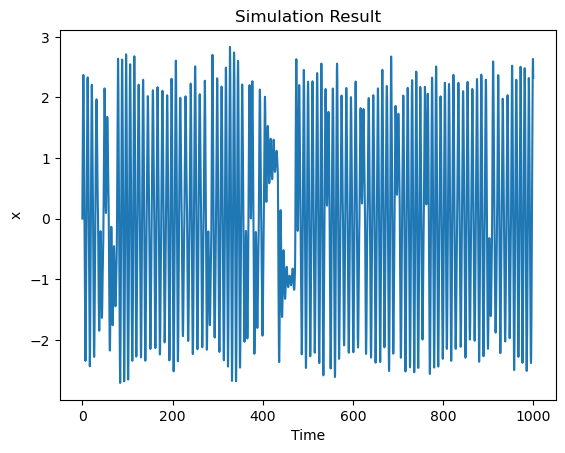

Execution time: 9.292902946472168 seconds


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numba import jit
import time

# Parameters
tau = 15.
gam = 0.1
tmax = 1000.
dt = 1.e-3
imax = int(tmax / dt)

# Generate noise (not JIT compiled)
def generate_noise(imax):
    noise = np.zeros(imax)
    for i in range(imax):
        u1 = np.random.rand(1)
        u2 = np.random.rand(1)
        z1 = np.sqrt(-2. * np.log(u1)) * np.cos(2.*np.pi* u2)
        noise[i] = z1[0]
    return noise

# Define functions for ODE (JIT compiled)
@jit(nopython=True)
def fx(t, x, v):
    return v

@jit(nopython=True)
def fxs(t, x, xs):
    return (x - xs) / tau

@jit(nopython=True)
def fv(t, x, xs, v, noise):
    return -gam * v - x + np.sign(x - xs) + noise

# Integrate ODE using solve_ivp
def integrate_ode():
    noise = generate_noise(imax)
    t_span = (0, tmax)
    y0 = [0, 0, 1]  # Initial conditions: x, xs, v
    t_eval = np.linspace(0, tmax, imax)
    sol = solve_ivp(lambda t, y: [fx(t, y[0], y[2]),
                                   fxs(t, y[0], y[1]),
                                   fv(t, y[0], y[1], y[2], noise[int(t / dt) - 1])],
                    t_span, y0, t_eval=t_eval)
    return sol.t, sol.y[0]

# Plotting
start_time = time.time()
t, x = integrate_ode()
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulation Result')
plt.savefig('test.png') 
plt.show()
print("Execution time: %s seconds" % (time.time() - start_time))